<a href="https://colab.research.google.com/github/JavierPachas/ml-projects/blob/main/ml3_intro_basic_decision_tree_rg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install mglearn

In [9]:
import mglearn
from IPython.display import display
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Price in $/Mbyte')

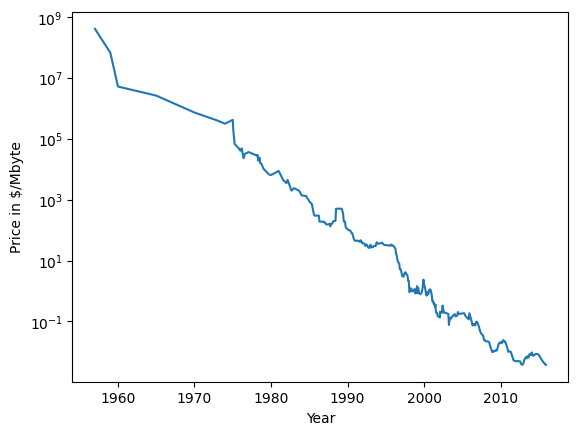

In [7]:
#Using decision tree model for regression
#historical computer memory (RAM) prices
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')


In [34]:
#building a tree using default setting
#Forecast for the years after 2000 using the historical data up to that
#point, with the date as our only feature.
#Comparing DecisionTreeRegressor and LinearRegression
#Rescaling the prices using a logarithm (to apply LinearRegression)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#predicting prices bases on date
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

X_test = data_test.date[:, np.newaxis]
y_test = np.log(data_test.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


<ipython-input-34-b0e10ce42987>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-34-b0e10ce42987>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = data_test.date[:, np.newaxis]
<ipython-input-34-b0e10ce42987>:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


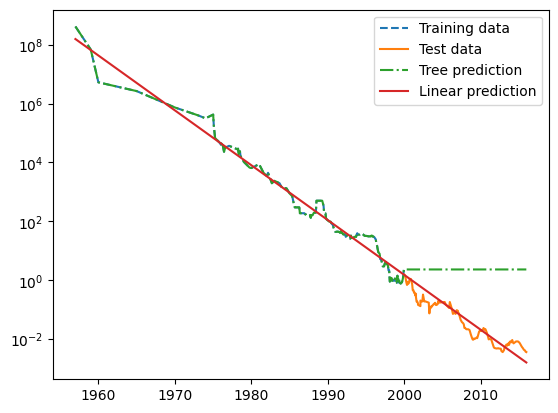

In [28]:
plt.semilogy(data_train.date, data_train.price, '--',label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, '-.',  label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The difference between the models is quite striking. The linear model approximates
the data with a line, as we knew it would. This line provides quite a good forecast for
the test data (the years after 2000), while glossing over some of the finer variations in
both the training and the test data. The tree model, on the other hand, makes perfect
predictions on the training data; we did not restrict the complexity of the tree, so it
learned the whole dataset by heart. However, once we leave the data range for which
the model has data, the model simply keeps predicting the last known point. The tree
has no ability to generate “new” responses, outside of what was seen in the training
data. This shortcoming applies to all models based on trees.

In [40]:
print('Accuracy of decision tree regressor (in train data): {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy of linear regresion (in train data): {:.3f}'.format(linear_reg.score(X_train, y_train)))
print('=======================')
print('Accuracy of decision tree regressor (in test data): {:.3f}'.format(tree.score(X_test, y_test)))
print('... that is why we can not use decision tree regressor outside the range in which the model has learned.')
print('Accuracy of linear regresion (in test data): {:.3f}'.format(linear_reg.score(X_test, y_test)))


Accuracy of decision tree regressor (in train data): 1.000
Accuracy of linear regresion (in train data): 0.959
Accuracy of decision tree regressor (in test data): -5.230
... that is why we can not use decision tree regressor outside the range in which the model has learned.
Accuracy of linear regresion (in test data): 0.830
